In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

baboon = cv.imread('/content/drive/MyDrive/TI3D/PCVK/mandrill.tiff')

Mengubah tingkat kecerahan citra
--------------------------------
Masukan nilai kecerahan: 50


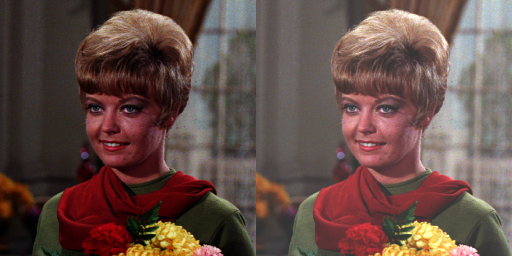

In [6]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
    brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/TI3D/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan & kontras citra
--------------------------------
Masukan nilai kecerahan: 60
Masukan Nilai Kontras [1.0-3.0]: 1.5


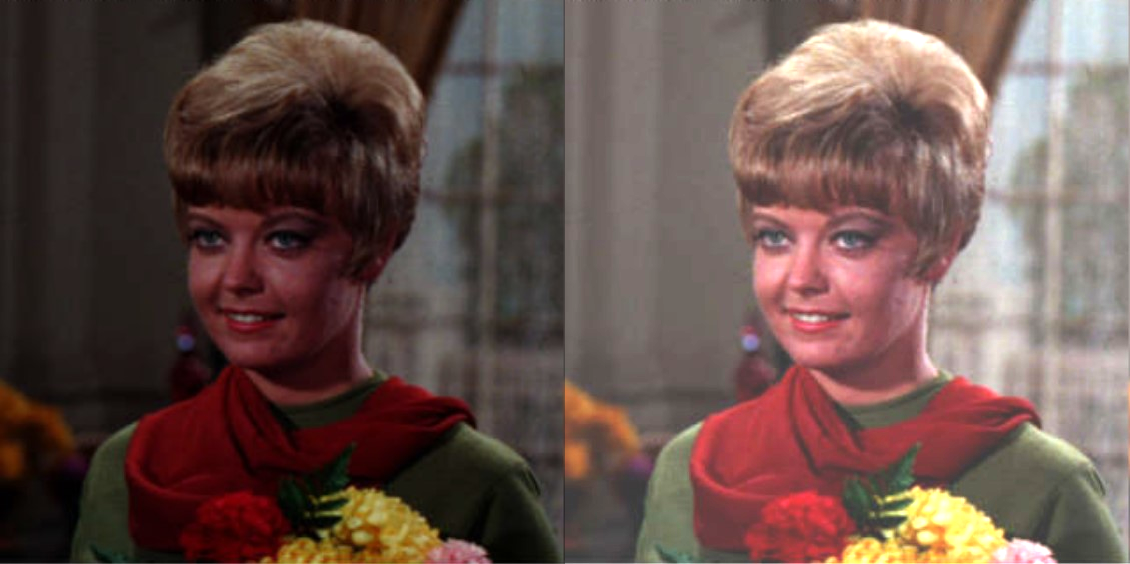

In [7]:
print('Mengubah tingkat kecerahan & kontras citra')
print('--------------------------------')
try:
    brightness = int(input('Masukan nilai kecerahan: '))
    contrast = float(input('Masukan Nilai Kontras [1.0-3.0]: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/TI3D/PCVK/female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Logarithmic Brightness
--------------------------------
Masukan nilai kecerahan: 40


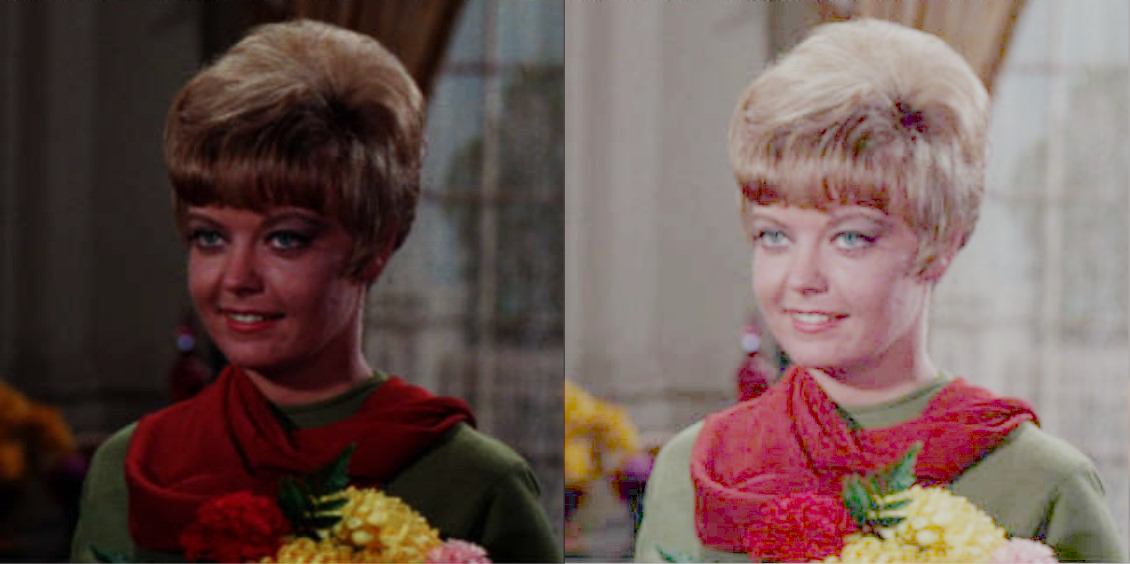

In [10]:
print('Logarithmic Brightness')
print('--------------------------------')

try:
    brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(brightness*(np.log(1.0+original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

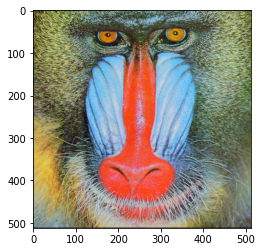

In [11]:
img_rgb = cv.cvtColor(baboon, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

Averaging

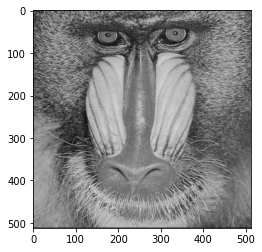

In [12]:
avgimg = baboon
x,y,z=avgimg.shape
avgimg[:] = avgimg.mean(axis=-1,keepdims=1) 
plt.imshow(avgimg)


In [ ]:
Lightness

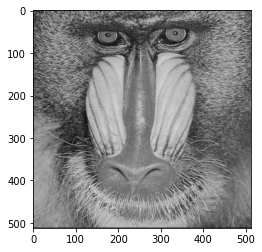

In [13]:
avgimg[:] = np.max(avgimg,axis=-1,keepdims=1)/2+np.min(avgimg,axis=-1,keepdims=1)/2
plt.imshow(avgimg)

Luminance

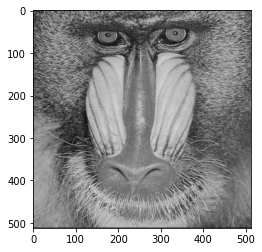

In [14]:
W = [0.2,0.5,0.3] 
W_mean = np.tensordot(avgimg,W, axes=((-1,-1)))[...,None]
avgimg[:] = W_mean.astype(avgimg.dtype)
plt.imshow(avgimg)

Showing Red Only

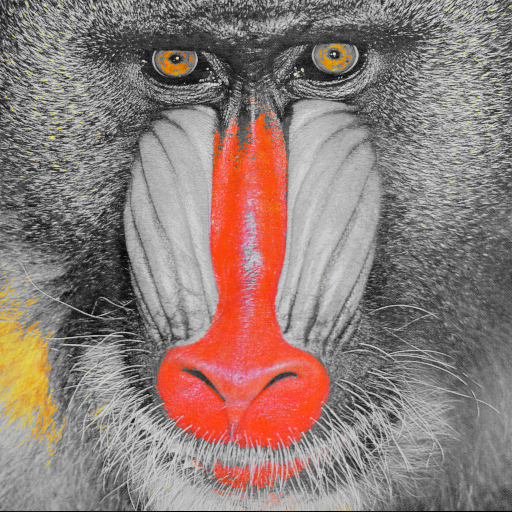

In [24]:
r = baboon.copy()
# creating mask using thresholding over `red` channel (use better use histogram to get threshoding value)
# I have used 200 as thershoding value it can be different for different images
ret, mask = cv.threshold(r[:, :,2], 200, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(r)
mask3[:, :, 0] = mask
mask3[:, :, 1] = mask
mask3[:, :, 2] = mask
# extracting `orange` region using `biteise_and`
red = cv.bitwise_and(r, mask3)
gray = cv.cvtColor(r, cv.COLOR_BGR2GRAY)
r  = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# extracting non-orange region
gray = cv.bitwise_and(r, 255 - mask3)

# orange masked output
out = gray + red
cv2_imshow(out)